# Data Modelling with Sci-kit Learn classification algorithms....
in this notebook we will work with various classification algorithms from the scikit-learn library.
we will evaluate these algorithms and compare their performance in order to find the most accurate model.

In [109]:
import pandas as pd
import numpy as np
X_train = pd.read_csv('Datasets/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
X_test = pd.read_csv('Datasets/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('Datasets/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('Datasets/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)



Import different classification algorithms from scikit-learn.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_train = y_train.flatten()
y_test = y_test.flatten()

In [4]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_tree_classifier = DecisionTreeClassifier()
model_svc = SVC()
model_gaussian = GaussianNB()
model_BG = BaggingClassifier(n_estimators=100)
model_RnForest = RandomForestClassifier(n_estimators=1000)
model_ETC = ExtraTreesClassifier(n_estimators=1000)
model_GBC = GradientBoostingClassifier(n_estimators=1000)

Now lets apply these models....

In [7]:
model_knn.fit(X_train,y_train)
model_tree_classifier.fit(X_train,y_train)
model_svc.fit(X_train,y_train)
model_gaussian.fit(X_train,y_train)
model_BG.fit(X_train,y_train)
model_RnForest.fit(X_train,y_train)
model_ETC.fit(X_train,y_train)
model_GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [9]:
print('KNN =',model_knn.score(X_test,y_test))
print('tree classifier = ',model_tree_classifier.score(X_test,y_test))
print('SVC = ',model_svc.score(X_test,y_test))
print('Gaussian = ',model_gaussian.score(X_test,y_test))
print('Bagging Classifier =',model_BG.score(X_test,y_test))
print('RandomForest =',model_RnForest.score(X_test,y_test))
print('Extra Trees Classifier =',model_ETC.score(X_test,y_test))
print('Gradient Boosted trees =',model_GBC.score(X_test,y_test))

KNN = 0.9032914828639295
tree classifier =  0.8615541228367831
SVC =  0.9402782490668476
Gaussian =  0.7702748557855447
Bagging Classifier = 0.8975229046487954
RandomForest = 0.9287410926365796
Extra Trees Classifier = 0.9412962334577536
Gradient Boosted trees = 0.9406175771971497


from the above algorithms we see that the best performing are SVC, Extra Tree Classifier and Gradient Boosted Trees. Now we will further work on our data set and try improving the accuracy to >95%.

Let us apply Scaling to the data and then Principal Component analaysis to improve the performance
of our model and reduce overfitting because we have more than 500 features and redusing these features would help.

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

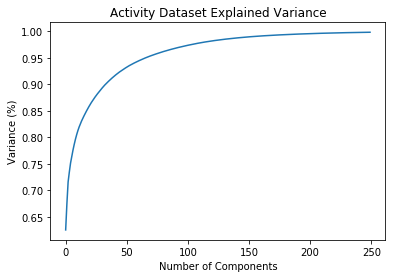

StandardScaler(copy=True, with_mean=True, with_std=True)

In [111]:
#pca = PCA().fit(X_train)
scaler = StandardScaler().fit(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Activity Dataset Explained Variance')
plt.show()
scaler
#X_train = scaler.transform(X_train)
#X_train = pca.transform(X_train)
#X_train.shape

Using the plot we can visualize that we dont need so many features as only after 100 features the variance is greater than 95%. hence we would reduce the features to 220 using our pca() function

In [85]:
pca = PCA(n_components = 250).fit(X_train)

In [112]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

After applying scaling and PCA we again fit our SVC model to see the improvement....

In [116]:
model_svc.fit(X_train,y_train)

c:\users\hamza-acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [121]:
y_pred = model_svc.predict(X_test)

In [117]:
model_svc.score(X_test,y_test)

0.9504580929759077

In [118]:
from sklearn.metrics import confusion_matrix

In [122]:
cm = confusion_matrix(y_test,y_pred)

A confusion matrix helps us understand how different classes have been misclassified. its a 2-D array which provides TP, TN, FP, FN.

In [126]:
print(cm)

[[473   1  22   0   0   0]
 [ 13 454   4   0   0   0]
 [  7  28 385   0   0   0]
 [  0   1   2 446  40   2]
 [  0   0   0  24 508   0]
 [  0   0   2   0   0 535]]


In [124]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           1     0.9594    0.9536    0.9565       496
           2     0.9380    0.9639    0.9508       471
           3     0.9277    0.9167    0.9222       420
           4     0.9489    0.9084    0.9282       491
           5     0.9270    0.9549    0.9407       532
           6     0.9963    0.9963    0.9963       537

   micro avg     0.9505    0.9505    0.9505      2947
   macro avg     0.9496    0.9490    0.9491      2947
weighted avg     0.9506    0.9505    0.9504      2947



we have used F1-Score because it is more suitable to our problem, since we are dealing with multi-class data we need to keep track of both correctly classified and misclassified data.